Top 10K Artisti negli Stati Uniti e le loro canzoni più famose

Per questo progetto abbiamo selezionato un dataset formato da 2 file csv. Essi raccolgono collettivamente i dati sulle 10 canzoni più popolari di ciascuno dei 10.000 artisti più ascoltati negli Stati Uniti.
Questo set di dati copre un'ampia gamma di generi musicali e un determinato periodo di tempo, catturando i gusti dinamici degli appassionati di musica nel paese.

Prima di iniziare, importiamo le librerie che andremo ad utilizzare

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Importiamo ora i file csv che compongono il dataset che analizzeremo

Importiamo il primo file contenente i dati relativi agli artisti. Lo andiamo a salvare in una variabile chiamata 'artisti'

In [2]:
artisti = pd.read_csv('Artists.csv', sep=',')

Osserviamo una 'preview' dei dati che 'artisti' contiene con il metodo 'head'

In [3]:
artisti.head()

,Name,ID,Gender,Age,Country,Genres,Popularity,Followers,URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4
1,Post Malone,246dkjvS1zLTtiykXe5h60,male,25,US,"['dfw rap', 'melodic rap', 'pop', 'rap']",86,43130108,spotify:artist:246dkjvS1zLTtiykXe5h60
2,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,male,29,GB,"['pop', 'singer-songwriter pop', 'uk pop']",87,115998928,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V
3,J Balvin,1vyhD5VmyZ7KMfW5gqLgo5,male,35,CO,"['reggaeton', 'reggaeton colombiano', 'trap la...",83,38028010,spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5
4,Bad Bunny,4q3ewBCX7sLwd24euuV69X,male,26,PR,"['reggaeton', 'trap latino', 'urbano latino']",95,77931484,spotify:artist:4q3ewBCX7sLwd24euuV69X


Importiamo il secondo file contenente i dati relativi alle canzoni degli artisti. Salviamolo in una variabile chiamata 'top_songs' ed osserviamo una 'preview' dei dati che contiene con il metodo usato precedentemente

In [3]:
top_songs = pd.read_csv('Top_Songs_US.csv', sep=',')

In [6]:
top_songs.head()

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity,Track Id,Track URI
0,album,3TVXtAsR1Inumwj472S9r4,Drake,1,IDGAF (feat. Yeat),True,For All The Dogs,2023-10-06,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,album,3TVXtAsR1Inumwj472S9r4,Drake,2,First Person Shooter (feat. J. Cole),True,For All The Dogs,2023-10-06,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU
2,album,3TVXtAsR1Inumwj472S9r4,Drake,3,Rich Baby Daddy (feat. Sexyy Red & SZA),True,For All The Dogs,2023-10-06,23,True,USUG12306085,319191,20,89,1yeB8MUNeLo9Ek1UEpsyz6,spotify:track:1yeB8MUNeLo9Ek1UEpsyz6
3,album,3TVXtAsR1Inumwj472S9r4,Drake,4,Jimmy Cooks (feat. 21 Savage),True,"Honestly, Nevermind",2022-06-17,14,True,USUG12204897,218364,14,89,3F5CgOj3wFlRv51JsHbxhe,spotify:track:3F5CgOj3wFlRv51JsHbxhe
4,album,3TVXtAsR1Inumwj472S9r4,Drake,5,One Dance,True,Views,2016-05-06,20,False,USCM51600028,173986,12,89,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0


Ora visualizziamo il tipo dei dati presenti nei file utilizzando il metodo 'info'. Esso è comunemente usato per ottenere informazioni sul tipo di dati di ogni colonna del dataset. Si possono inoltre controllare valori come la presenza di valori null e l'utilizzo di memoria. 
È cruciale ricevere informazioni sul tipo di dati che il dataset contiene in modo da comprendere al meglio come trattare e processare i dati.

In [4]:
artisti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9488 entries, 0 to 9487
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9488 non-null   object
 1   ID          9488 non-null   object
 2   Gender      7829 non-null   object
 3   Age         9488 non-null   int64 
 4   Country     6305 non-null   object
 5   Genres      9488 non-null   object
 6   Popularity  9488 non-null   int64 
 7   Followers   9488 non-null   int64 
 8   URI         9488 non-null   object
dtypes: int64(3), object(6)
memory usage: 667.3+ KB


Dalla precedente operazione, osserviamo che su 9488 valori per ciascuna colonna, nelle colonne 'Gender' e 'Country' il numero dei valori non-null è più basso. Ciò significa che sono presenti valori null (NaN). Procediamo dunque ad eliminarli con il metodo 'dropna'.

Eseguiamo il metodo su tutto il file degli artisti. In questo modo, i dati risultano maggiormente rappresentativi.

In [4]:
artisti_no_nan = artisti.dropna()

Verifichiamo che l'operazione sia andata a buon fine

In [5]:
artisti_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 9487
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        6126 non-null   object
 1   ID          6126 non-null   object
 2   Gender      6126 non-null   object
 3   Age         6126 non-null   int64 
 4   Country     6126 non-null   object
 5   Genres      6126 non-null   object
 6   Popularity  6126 non-null   int64 
 7   Followers   6126 non-null   int64 
 8   URI         6126 non-null   object
dtypes: int64(3), object(6)
memory usage: 478.6+ KB


Notiamo che il numero dei valori non-null in ciascuna colonna è ora uguale per tutte le colonne. Ciò significa che i valori NaN nelle colonne 'Country' e 'Gender' sono stati rimossi, e con loro l'intera riga in cui erano contenuti. In questo modo, gli artisti che contenevano informazioni mancanti non verranno presi in considerazione.

Eseguiamo ora l'analisi del tipo dei dati del file 'top_songs' utilizzando il metodo 'info'

In [7]:
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37146 entries, 0 to 37145
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Album Type          37146 non-null  object
 1   Artist ID           37146 non-null  object
 2   Artist Name         37146 non-null  object
 3   Artist Song Rank    37146 non-null  int64 
 4   Track Name          37146 non-null  object
 5   Is Playable         37146 non-null  bool  
 6   Album Name          37146 non-null  object
 7   Release Date        37146 non-null  object
 8   Total Album Tracks  37146 non-null  int64 
 9   Is Explicit         37146 non-null  bool  
 10  ISRC                37146 non-null  object
 11  Song Duration       37146 non-null  int64 
 12  Track Number        37146 non-null  int64 
 13  Popularity          37146 non-null  int64 
 14  Track Id            37146 non-null  object
 15  Track URI           37146 non-null  object
dtypes: bool(2), int64(5), 

Notiamo che non ci sono colonne che presentano valori null, poichè il valore dei dati non-null risulta essere 37146 per ciascuna.

Osserviamo però che il tipo della colonna 'Release Date' non risulta essere corretto. Esso infatti è un object, dunque andiamo a convertirlo in tipo datetime.

In [12]:
top_songs['Release Date'] = pd.to_datetime(top_songs['Release Date'], utc=True).dt.tz_convert('Europe/Berlin')

Verifichiamo che il tipo della colonna 'Release Date' sia stato correttamente convertito

In [13]:
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37146 entries, 0 to 37145
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype                        
---  ------              --------------  -----                        
 0   Album Type          37146 non-null  object                       
 1   Artist ID           37146 non-null  object                       
 2   Artist Name         37146 non-null  object                       
 3   Artist Song Rank    37146 non-null  int64                        
 4   Track Name          37146 non-null  object                       
 5   Is Playable         37146 non-null  bool                         
 6   Album Name          37146 non-null  object                       
 7   Release Date        37146 non-null  datetime64[ns, Europe/Berlin]
 8   Total Album Tracks  37146 non-null  int64                        
 9   Is Explicit         37146 non-null  bool                         
 10  ISRC                37146 non-null

Osserviamo come è cambiata la colonna 'Release Date'

In [14]:
top_songs.head()

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity,Track Id,Track URI
0,album,3TVXtAsR1Inumwj472S9r4,Drake,1,IDGAF (feat. Yeat),True,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,album,3TVXtAsR1Inumwj472S9r4,Drake,2,First Person Shooter (feat. J. Cole),True,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU
2,album,3TVXtAsR1Inumwj472S9r4,Drake,3,Rich Baby Daddy (feat. Sexyy Red & SZA),True,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306085,319191,20,89,1yeB8MUNeLo9Ek1UEpsyz6,spotify:track:1yeB8MUNeLo9Ek1UEpsyz6
3,album,3TVXtAsR1Inumwj472S9r4,Drake,4,Jimmy Cooks (feat. 21 Savage),True,"Honestly, Nevermind",2022-06-17 02:00:00+02:00,14,True,USUG12204897,218364,14,89,3F5CgOj3wFlRv51JsHbxhe,spotify:track:3F5CgOj3wFlRv51JsHbxhe
4,album,3TVXtAsR1Inumwj472S9r4,Drake,5,One Dance,True,Views,2016-05-06 02:00:00+02:00,20,False,USCM51600028,173986,12,89,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0


-----------------------------------------------------------------------

Controlliamo se i due file contengono valori duplicati utilizzando il metodo 'duplicated' e un check per verificare in caso dove sono collocati. Cominciamo con il primo file

In [8]:
check = artisti.duplicated()

if check.any():
    duplicate_rows = artisti[check]
    print("Righe duplicate trovate:")
    print(duplicate_rows)
else:
    print("Nessuna riga duplicata trovata")

Nessuna riga duplicata trovata


Osserviamo che il file degli artisti non contiene valori duplicati. Analizziamo il secondo utilizzando lo stesso metodo e un check

In [9]:
check_2 = top_songs.duplicated()

if check_2.any():
    duplicate_rows_2 = top_songs[check_2]
    print("Righe duplicate trovate:")
    print(duplicate_rows_2)
else:
    print("Nessuna riga duplicata trovata")

Righe duplicate trovate:
      Album Type               Artist ID Artist Name  Artist Song Rank  \
4034       album  3TVXtAsR1Inumwj472S9r4       Drake                 1   
4035       album  3TVXtAsR1Inumwj472S9r4       Drake                 2   
4036       album  3TVXtAsR1Inumwj472S9r4       Drake                 3   
4037       album  3TVXtAsR1Inumwj472S9r4       Drake                 4   
4038       album  3TVXtAsR1Inumwj472S9r4       Drake                 5   
...          ...                     ...         ...               ...   
37141      album  5LHRHt1k9lMyONurDHEdrp        Tyga                 6   
37142      album  5LHRHt1k9lMyONurDHEdrp        Tyga                 7   
37143      album  5LHRHt1k9lMyONurDHEdrp        Tyga                 8   
37144     single  5LHRHt1k9lMyONurDHEdrp        Tyga                 9   
37145     single  5LHRHt1k9lMyONurDHEdrp        Tyga                10   

                                    Track Name  Is Playable  \
4034                   

Dall'output ottenuto notiamo la presenza di diverse righe duplicate. Andiamo ad eliminarle utilizzando il metodo 'drop_duplicates' e salviamo il contenuto in una variabile.

Eliminare i valori duplicati può essere fondamentale per poter assicurare la precisione del dataset. I valori duplicati, o in questo caso le righe, possono distorcere le analisi statistiche e introdurre discrepanze, oltre a causare ripetizioni superflue e un maggior consumo di memoria.

In [17]:
top_songs_unique = top_songs.drop_duplicates(subset=['Artist ID', 'Track Id'])

Verifichiamo che l'operazione precedente sia andata a buon fine utilizzando lo stesso metodo e il check

In [18]:
check_unique = top_songs_unique.duplicated()

if check_unique.any():
    duplicate_rows_unique = top_songs_unique[check_unique]
    print("Righe duplicate trovate:")
    print(duplicate_rows_unique)
else:
    print("Nessuna riga duplicata trovata")

Nessuna riga duplicata trovata


Concludiamo la sezione dedicata alle operazioni preliminari e cominciamo l'analisi vera e propria del dataset

------------------------------------------------------------------

Per prima cosa, eseguiamo il merge dei due file tramite l'ID dell'artista, essendo un valore comune. Visto che la colonna relativa all'ID dell'artista presenta un nome diverso in ciascun file, utilizziamo i parametri 'left_on' e 'right_on' per specificare il nome corretto.

'ID' è il nome della colonna relativa all'ID dell'artista nel file degli artisti, mentre 'Artist ID' è il nome della medesima colonna ma all'interno del file delle top songs

In [19]:
merged_dataset = pd.merge(artisti_no_nan, top_songs_unique, left_on='ID', right_on='Artist ID')

Visualizziamo il contenuto del merge

In [20]:
merged_dataset

,Name,ID,Gender,Age,Country,Genres,Popularity_x,Followers,URI,Album Type,...,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity_y,Track Id,Track URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU
2,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306085,319191,20,89,1yeB8MUNeLo9Ek1UEpsyz6,spotify:track:1yeB8MUNeLo9Ek1UEpsyz6
3,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,"Honestly, Nevermind",2022-06-17 02:00:00+02:00,14,True,USUG12204897,218364,14,89,3F5CgOj3wFlRv51JsHbxhe,spotify:track:3F5CgOj3wFlRv51JsHbxhe
4,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,Views,2016-05-06 02:00:00+02:00,20,False,USCM51600028,173986,12,89,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,Gillian Welch,2H5elA2mJKrHmqkN9GSfkz,male,28,DK,"['alternative country', 'canadian singer-songw...",47,220293,spotify:artist:2H5elA2mJKrHmqkN9GSfkz,album,...,The Harrow & The Harvest,2011-06-28 02:00:00+02:00,10,False,US2AR1110904,241957,4,42,6jx8L9ng94zKcw4xbbQFjC,spotify:track:6jx8L9ng94zKcw4xbbQFjC
3524,Gillian Welch,2H5elA2mJKrHmqkN9GSfkz,male,28,DK,"['alternative country', 'canadian singer-songw...",47,220293,spotify:artist:2H5elA2mJKrHmqkN9GSfkz,album,...,Revival,1996-04-09 02:00:00+02:00,10,False,USAL19600602,243866,2,40,3ZtC9ZDhPJj0E043tmlOgx,spotify:track:3ZtC9ZDhPJj0E043tmlOgx
3525,Gillian Welch,2H5elA2mJKrHmqkN9GSfkz,male,28,DK,"['alternative country', 'canadian singer-songw...",47,220293,spotify:artist:2H5elA2mJKrHmqkN9GSfkz,album,...,Boots No. 1: The Official Revival Bootleg,2016-11-25 01:00:00+01:00,21,False,US2AR1660117,175083,7,40,0ddo16GDbp9RoNzT285C4R,spotify:track:0ddo16GDbp9RoNzT285C4R
3526,Gillian Welch,2H5elA2mJKrHmqkN9GSfkz,male,28,DK,"['alternative country', 'canadian singer-songw...",47,220293,spotify:artist:2H5elA2mJKrHmqkN9GSfkz,album,...,Time (The Revelator),2001-07-31 02:00:00+02:00,10,False,US2AR0110301,382560,1,39,4Ui86NRu1aoBGRUJyPusp6,spotify:track:4Ui86NRu1aoBGRUJyPusp6


Dall'output ottenuto notiamo che la colonna 'Popularity' ha assunto 2 nomi diversi per poter essere identificata correttamente. Visto che questa colonna presenta lo stesso nome in entrambi i file ma assume diversi valori e significati, sono stati aggiunti dei suffissi per poterle distinguere. 
La colonna 'Popularity_x' fa riferimento alla popolarità degli artisti del primo file, mentre la seconda colonna, chiamata 'Popularity_y', fa riferimento alla popolarità delle canzoni per ciascun artista del secondo file.

Di seguito creiamo un file csv contenente il merge dei due file 'artisti' e 'top_songs' per poter osservare più chiaramente il contenuto in un unico file. 
Essendo l'unione del file 'artisti' che non presenta valori null e del file 'top songs' privo di duplicati, questo merge non contiene valori Nan e valori duplicati. 

Utilizziamo il metodo 'to_csv'

In [22]:
merged_dataset.to_csv('Merge.csv', index=False)

Iniziamo l'analisi del dataset identificando il genere musicale più popolare.

Per prima cosa, identifichiamo quale genere musicale degli artisti è il più famoso.
Dunque, raggruppiamo per genere ed eseguiamo la somma della popolarità per ciascun genere

In [23]:
# popolarità dell'artista 'Popularity_x'

artist_popularity = merged_dataset.groupby('Genres')['Popularity_x'].sum()

Di seguito, identifichiamo quale genere musicale delle canzoni è il più famoso. Dunque, raggruppiamo per genere ed eseguiamo la somma della popolarità per ciascun genere

In [24]:
# popolarità delle canzoni 'Popularity_y'

song_popularity = merged_dataset.groupby('Genres')['Popularity_y'].sum()

Visualizziamo i risultati che salviamo dentro a delle variabili. Utilizziamo il metodo 'idxmax' che riporta la label della riga del valore massimo.

In [25]:
# visualizziamo il genere dell'artista più ascoltato/popolare
most_listened_artist_genre = artist_popularity.idxmax()
most_listened_artist_genre

"['pop']"

In [26]:
# visualizziamo il genere delle canzoni più ascoltate/popolari
most_listened_song_genre = song_popularity.idxmax()
most_listened_song_genre

"['pop']"

Osserviamo dunque che il genere più popolare è il pop, sia per quanto riguarda gli artisti che le canzoni. Ma è sempre stato così? Il pop è sempre stato il genere musicale più famoso? Lo analizzeremo più avanti. Vediamo ora nel dettaglio gli artisti più popolari e di quali generi musicali fanno parte, per osservare se insieme al popo sono presenti altri generi famosi.

Analizziamo ora l'artista più famoso

In [27]:
popolarità_artista = merged_dataset.groupby(['ID', 'Name', 'Gender', 'Genres'])['Popularity_x'].sum()

most_popular_artist = popolarità_artista.idxmax()
most_popular_artist

('06HL4z0CvFAxyc27GXpf02', 'Taylor Swift', 'female', "['pop']")

Dall'output ottenuto vediamo Taylor Swift come artista più popolare. Chi altro presenta una popolarità elevata? 

In [28]:
# ora osserviamo la top 5 artisti più famosi
top_5_artists = popolarità_artista.nlargest(5)
top_5_artists

ID                      Name          Gender  Genres                                                           
06HL4z0CvFAxyc27GXpf02  Taylor Swift  female  ['pop']                                                              1000
3TVXtAsR1Inumwj472S9r4  Drake         male    ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']     950
4q3ewBCX7sLwd24euuV69X  Bad Bunny     male    ['reggaeton', 'trap latino', 'urbano latino']                         950
1Xyo4u8uXC1ZmMpatF05PJ  The Weeknd    male    ['canadian contemporary r&b', 'canadian pop', 'pop']                  930
0Y5tJX1MQlPlqiwlOH1tJY  Travis Scott  male    ['hip hop', 'rap', 'slap house']                                      900
Name: Popularity_x, dtype: int64

Ampliamo ulteriormente l'output

In [29]:
top_10_with_genre = popolarità_artista.nlargest(10)
top_10_with_genre

ID                      Name           Gender  Genres                                                                                                 
06HL4z0CvFAxyc27GXpf02  Taylor Swift   female  ['pop']                                                                                                    1000
3TVXtAsR1Inumwj472S9r4  Drake          male    ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']                                           950
4q3ewBCX7sLwd24euuV69X  Bad Bunny      male    ['reggaeton', 'trap latino', 'urbano latino']                                                               950
1Xyo4u8uXC1ZmMpatF05PJ  The Weeknd     male    ['canadian contemporary r&b', 'canadian pop', 'pop']                                                        930
0Y5tJX1MQlPlqiwlOH1tJY  Travis Scott   male    ['hip hop', 'rap', 'slap house']                                                                            900
00FQb4jTyendYWaN8pK0wa  Lana Del Rey   female  ['art p

Da questa analisi vediamo che, oltre al pop, i generi che compaiono più volte sono 'hip hop' e 'rap', insieme ai loro sotto generi (e.g 'atl hip hop')

Possiamo concludere che, in generale, quelli citati sono i generi musicali ai quali appartengono gli artisti più popolari. Deduciamo dunque che, conseguentemente, questi generi sono i più famosi. È sempre stato così? Se dovessimo analizzare uno specifico arco temporale, troveremo lo stesso risultato? Oppure potremmo trovare dei periodi di tempo in cui questi generi musicali (o gli artisti stessi) non erano poi così famosi? 

-----------------------------------------------------------------------------------------------------------------------------

Cominciamo con il cercare un determinato periodo di tempo in cui sono state pubblicate il maggior numero di canzoni, per poter vedere nel corso del tempo come si sono evoluti i rilasci delle canzoni.

Osserviamo le canzoni rilasciate in ciascun anno per ottenere un totale.

In [30]:
top_songs_unique['Release Year'] = top_songs_unique['Release Date'].dt.year #estraiamo l'anno dalla data di rilascio delle canzoni

C:\Users\User\AppData\Local\Temp\ipykernel_22408\783290743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_unique['Release Year'] = top_songs_unique['Release Date'].dt.year #estraiamo l'anno dalla data di rilascio delle canzoni


In [31]:
canzoni_per_anno = top_songs_unique.groupby('Release Year').size()
canzoni_per_anno

Release Year
1964      3
1965      2
1966      3
1967      1
1969      1
1974      1
1975      1
1976      1
1977      2
1978      1
1979      1
1980      3
1982      1
1984      2
1987      1
1988      3
1990      1
1991      1
1992      1
1993      2
1994      9
1995      6
1996      1
1997      4
1998      1
1999      7
2000      6
2001     17
2002     15
2003      7
2004      9
2005     20
2006     11
2007     23
2008     26
2009     27
2010     48
2011     51
2012     66
2013    102
2014    111
2015    173
2016    210
2017    324
2018    424
2019    454
2020    346
2021    303
2022    387
2023    814
dtype: int64

Utilizziamo un grafico per poter osservare i dati più chiaramente.

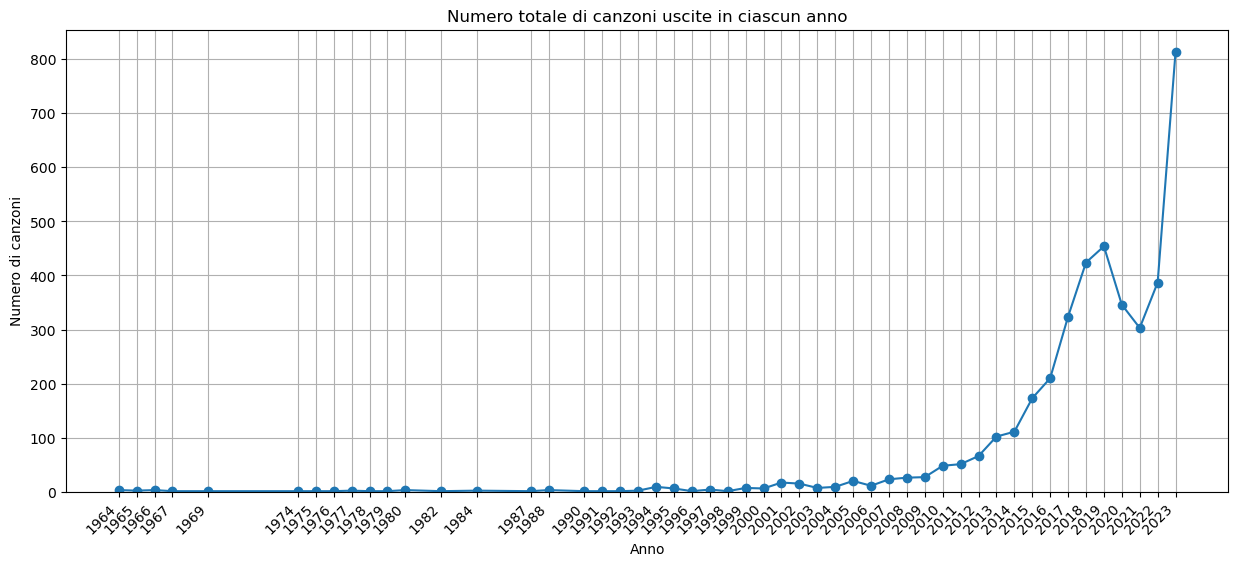

In [32]:
plt.figure(figsize=(15,6))
plt.plot(canzoni_per_anno.index, canzoni_per_anno, marker='o')
plt.title('Numero totale di canzoni uscite in ciascun anno')
plt.xlabel('Anno')
plt.ylabel('Numero di canzoni')

plt.xticks(rotation=45, ha='right') # ha = horizontal alignment
plt.xticks(canzoni_per_anno.index)

plt.gca().set_ylim(bottom=0) # gca = get current axes. Usato per utilizzare metodi custom. Utilizzo di set_ylim per settare un limite all'asse y

plt.grid(True)

plt.show()

Osserviamo che l'anno con il maggior numero di canzoni rilasciate è il 2023.

-------------------------------------------------------------------------------------------------------

Vediamo ora nel dettaglio l'anno 2023 cercando il mese con il numero di canzoni rilasciate più alto

In [33]:
top_songs_unique['Release Month'] = top_songs_unique['Release Date'].dt.month_name() #estraiamo il mese dalla data di rilascio delle canzoni

C:\Users\User\AppData\Local\Temp\ipykernel_22408\3678312688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_unique['Release Month'] = top_songs_unique['Release Date'].dt.month_name() #estraiamo il mese dalla data di rilascio delle canzoni


In [34]:
yearly_release_counts = top_songs_unique.groupby(['Release Year', 'Release Month']).size().reset_index(name='count')
yearly_release_counts

,Release Year,Release Month,count
0,1964,August,3
1,1965,July,1
2,1965,November,1
3,1966,August,1
4,1966,February,2
...,...,...,...
255,2023,March,53
256,2023,May,47
257,2023,November,146
258,2023,October,123


In [35]:
max_count = yearly_release_counts.loc[yearly_release_counts['count'].idxmax()]
max_count

Release Year         2023
Release Month    November
count                 146
Name: 257, dtype: object

Osserviamo essere Novembre. Vediamo i dati in modo più chiaro.

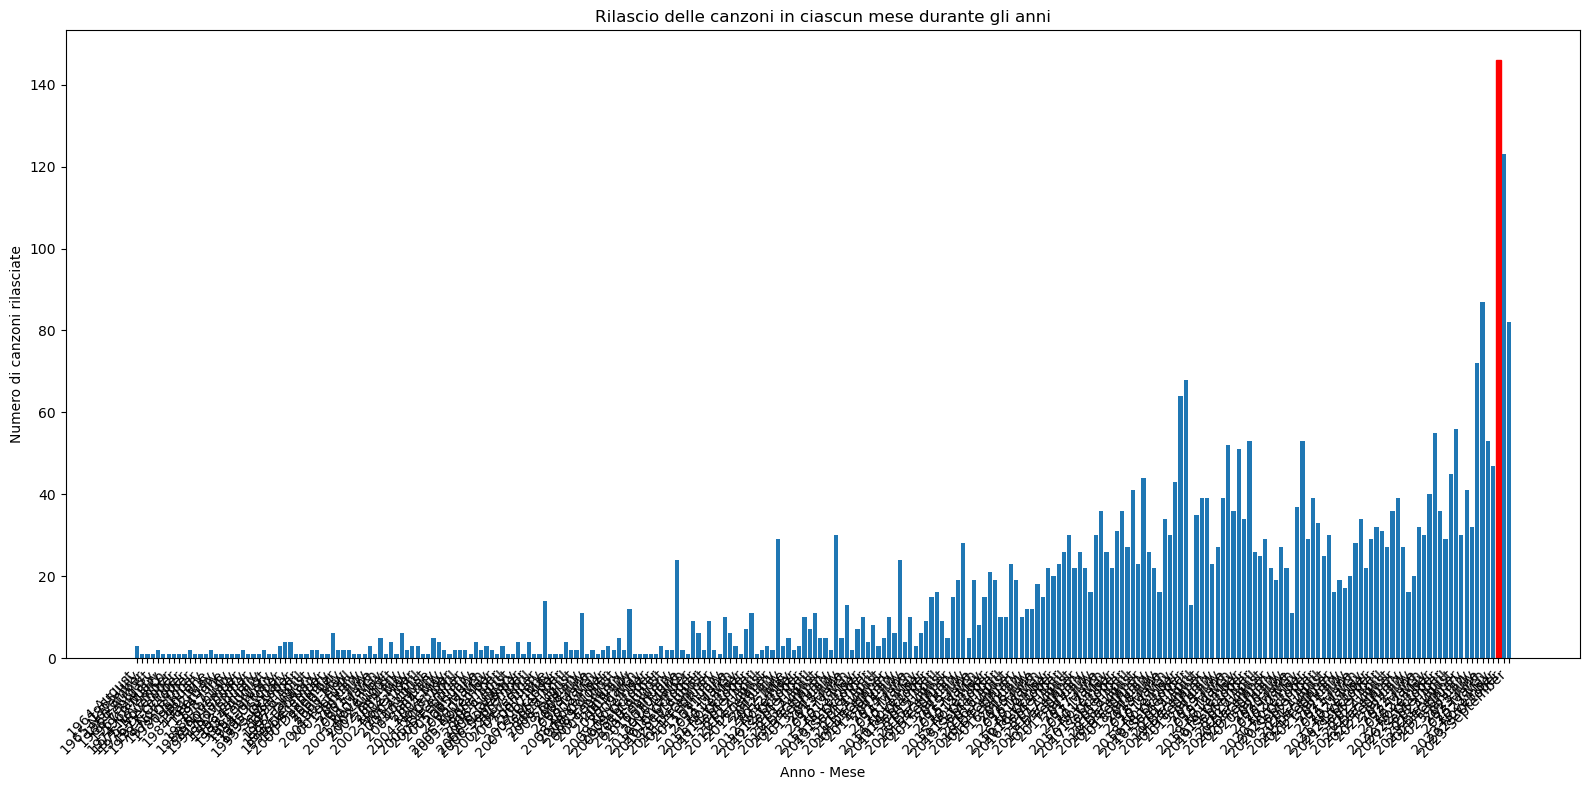

In [36]:
plt.figure(figsize=(16,8))
bars = plt.bar(yearly_release_counts['Release Year'].astype(str) + '-' + yearly_release_counts['Release Month'], yearly_release_counts['count'])

max_year_month_row = yearly_release_counts.loc[yearly_release_counts['count'].idxmax()]

highlight_index = yearly_release_counts[(yearly_release_counts['Release Year'] == max_year_month_row['Release Year']) & (yearly_release_counts['Release Month'] == max_year_month_row['Release Month'])].index

plt.title('Rilascio delle canzoni in ciascun mese durante gli anni')
plt.xlabel('Anno - Mese')
plt.ylabel('Numero di canzoni rilasciate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for index in highlight_index:
    bars[index].set_color('red')

plt.show()

Ora focalizziamoci sull'anno 2023 per poter vedere il grafico più chiaramente

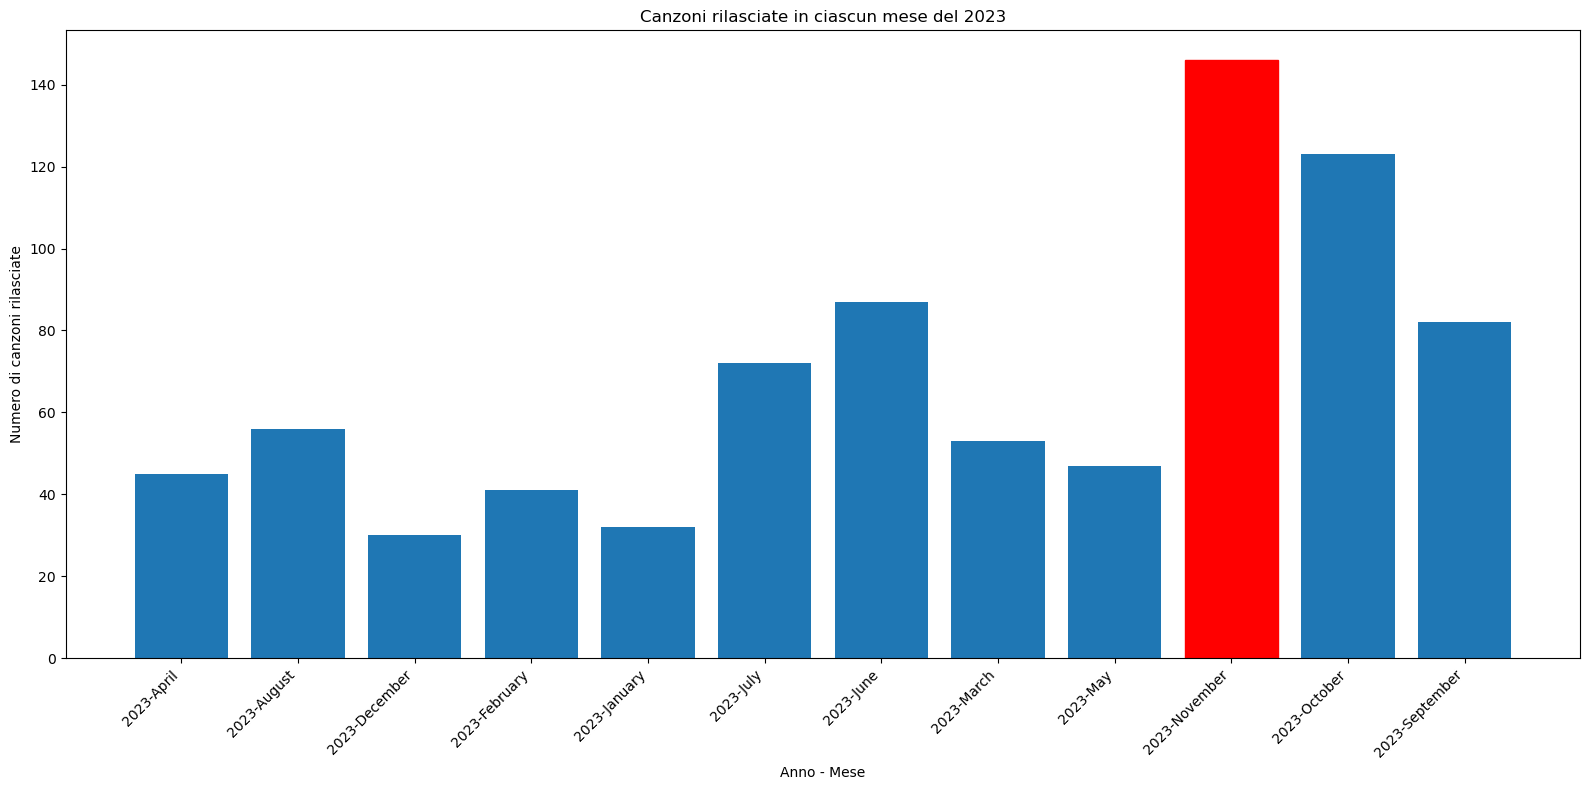

In [38]:
top_songs_2023 = top_songs_unique[top_songs_unique['Release Year'] == 2023]

yearly_release_counts_2023 = top_songs_2023.groupby(['Release Year', 'Release Month']).size().reset_index(name='count')

max_year_month_2023 = yearly_release_counts_2023.loc[yearly_release_counts_2023['count'].idxmax()]

highlight_index_2023 = yearly_release_counts_2023[(yearly_release_counts_2023['Release Month'] == max_year_month_2023['Release Month'])].index

plt.figure(figsize=(16,8))
bars_2023 = plt.bar(yearly_release_counts_2023['Release Year'].astype(str) + '-' + yearly_release_counts_2023['Release Month'], yearly_release_counts_2023['count'])

for index in highlight_index_2023:
    bars_2023[index].set_color('red')

plt.title('Canzoni rilasciate in ciascun mese del 2023')
plt.xlabel('Anno - Mese')
plt.ylabel('Numero di canzoni rilasciate')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [39]:
# Creo una nuova colonna per il decennio
merged_dataset['Decennio'] = (merged_dataset['Release Date'].dt.year // 10) * 10

# Raggruppo per decennio e genere. Calcolo poi la popolarità totale per ciascun genere
genere_decennio_popularity = merged_dataset.groupby(['Decennio', 'Genres'])['Popularity_x'].sum().reset_index()

# Identifico il genere più famoso per decennio
most_famous_genre_per_decade = genere_decennio_popularity.loc[genere_decennio_popularity.groupby('Decennio')['Popularity_x'].idxmax()]

# Raggruppo per decennio e artista. Calcolo poi la popolarità totale per ciascun artista
artista_decennio_popularity = merged_dataset.groupby(['Decennio', 'Artist ID', 'Name'])['Popularity_y'].sum().reset_index()

# Identifico l'artista più famoso per decennio
most_famous_artist_per_decade = artista_decennio_popularity.loc[artista_decennio_popularity.groupby('Decennio')['Popularity_y'].idxmax()]

print("Genere più famoso per decennio:")
print(most_famous_genre_per_decade[['Decennio', 'Genres', 'Popularity_x']])
print("\nArtista più famoso per decennio:")
print(most_famous_artist_per_decade[['Decennio', 'Artist ID', 'Name', 'Popularity_y']])


Genere più famoso per decennio:
     Decennio                                             Genres  Popularity_x
1        1960  ['classic girl group', 'classic soul', 'disco'...           558
3        1970              ['classic rock', 'glam rock', 'rock']           492
6        1980              ['classic rock', 'glam rock', 'rock']           328
8        1990  ['beatlesque', 'britpop', 'madchester', 'perma...           592
39       2000                               ['dance pop', 'pop']           632
292      2010                                            ['pop']          6817
534      2020                                            ['pop']          5613

Artista più famoso per decennio:
     Decennio               Artist ID          Name  Popularity_y
1        1960  57bUPid8xztkieZfS7OlEV  The Supremes           567
3        1970  1dfeR4HaWDbWqFHLkxsg1d         Queen           431
6        1980  2nszmSgqreHSdJA3zWPyrW   Luis Miguel           314
9        1990  2DaxqgrOhkeH0fpeiQq2f4 

Utilizziamo dei grafici per capire più chiaramente l'output ottenuto

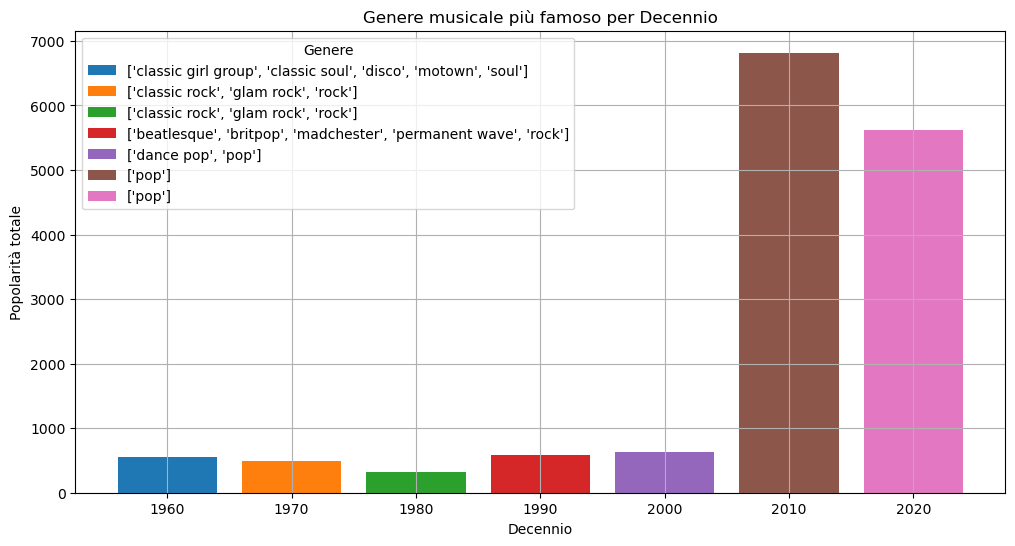

In [40]:
# Plot del genere più famoso per decennio
plt.figure(figsize=(12, 6))
for Decennio, group in most_famous_genre_per_decade.groupby('Decennio'):
    plt.bar(str(Decennio), group['Popularity_x'].iloc[0], label=group['Genres'].iloc[0])

plt.title('Genere musicale più famoso per Decennio')
plt.xlabel('Decennio')
plt.ylabel('Popolarità totale')
plt.legend(title='Genere')
plt.grid(True)
plt.show()

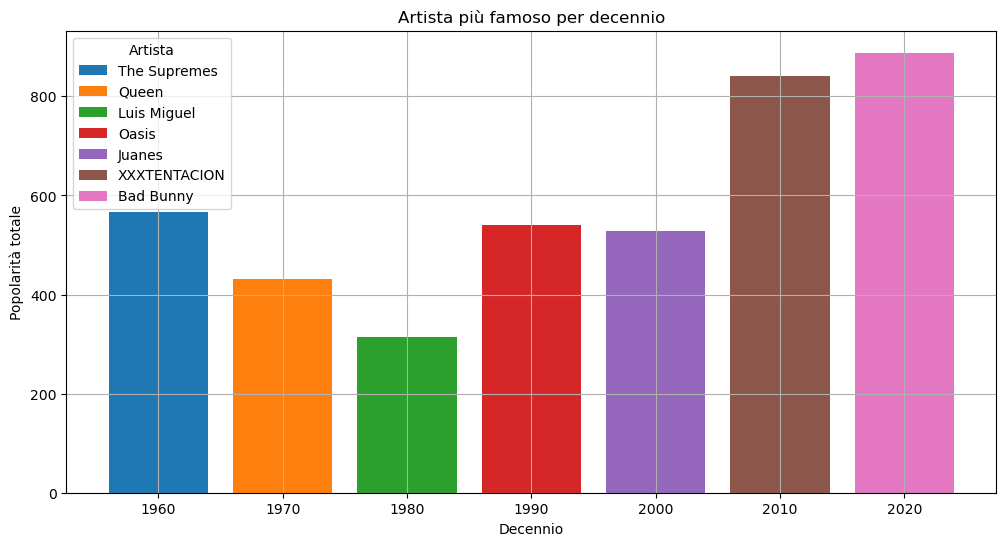

In [41]:
# Plot dell'artista più famoso per decennio
plt.figure(figsize=(12, 6))
for Decennio, group in most_famous_artist_per_decade.groupby('Decennio'):
    plt.bar(str(Decennio), group['Popularity_y'].iloc[0], label=group['Name'].iloc[0])

plt.title('Artista più famoso per decennio')
plt.xlabel('Decennio')
plt.ylabel('Popolarità totale')
plt.legend(title='Artista')
plt.grid(True)
plt.show()


Identifichiamo ora la canzone più popolare per ciascun decennio. Utilizziamo poi un grafico per visualizzare meglio i risultati.

In [42]:
merged_dataset['Decennio'] = (merged_dataset['Release Date'].dt.year // 10) * 10
canzone_decennio_popularity = merged_dataset.groupby(['Decennio', 'Artist Name','Track Name', 'Track Id'])['Popularity_y'].sum().reset_index()

most_popular_song_decennio = canzone_decennio_popularity.loc[canzone_decennio_popularity.groupby('Decennio')['Popularity_y'].idxmax()]

print("Canzone più popolare per decennio:")
print(most_popular_song_decennio[['Decennio','Track Name','Popularity_y', 'Artist Name','Track Id']])


Canzone più popolare per decennio:
      Decennio                           Track Name  Popularity_y  \
8         1960                 You Can't Hurry Love            76   
12        1970  Don't Stop Me Now - Remastered 2011            76   
19        1980              Ahora Te Puedes Marchar            82   
44        1990      All I Want for Christmas Is You            99   
82        2000                               Yellow            92   
1749      2010                         Cruel Summer            99   
2060      2020                          PERRO NEGRO            97   

       Artist Name                Track Id  
8     The Supremes  1OppEieGNdItZbE14gLBEv  
12           Queen  7hQJA50XrCWABAu5v6QZ4i  
19     Luis Miguel  1uKjQoh8JZj9ryuYRhpd7E  
44    Mariah Carey  0bYg9bo50gSsH3LtXe2SQn  
82        Coldplay  3AJwUDP919kvQ9QcozQPxg  
1749  Taylor Swift  1BxfuPKGuaTgP7aM0Bbdwr  
2060     Bad Bunny  7iQXYTyuG13aoeHxGG28Nh  


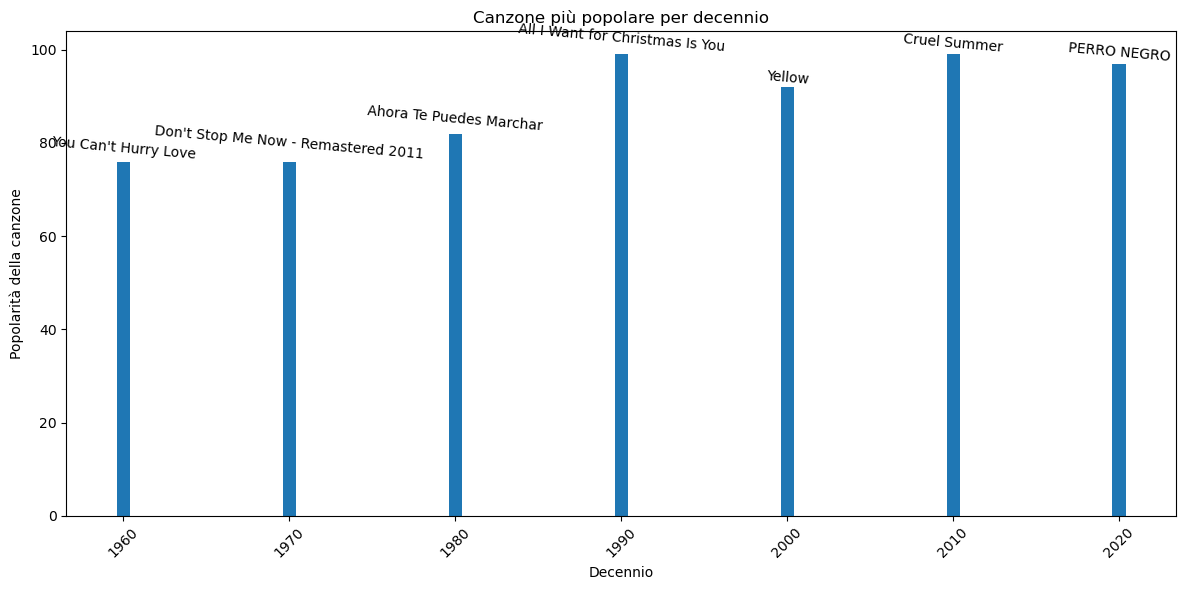

In [43]:
plt.figure(figsize=(12,6))
graph = plt.bar(most_popular_song_decennio['Decennio'], most_popular_song_decennio['Popularity_y'])
plt.title('Canzone più popolare per decennio')
plt.xlabel('Decennio')
plt.ylabel('Popolarità della canzone')
plt.xticks(rotation=45)

for bar, song_title in zip(graph, most_popular_song_decennio['Track Name']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), song_title, ha='center', va='bottom', rotation=-5) # va = vertical alignment

plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------

Come ultima analisi, concentriamoci su quali fattori possono influenzare maggiormente la popolarità degli artisti. Per popolarità intendiamo sia la popolarità in sè sia il numero di followers. 

Per prima cosa, analizziamo la correlazione tra il paese di origine e la popolarità in sè, dunque utilizzando la colonna 'Popularity'.

In [44]:
correlation_2 = artisti_no_nan['Country'].astype('category').cat.codes.corr(artisti_no_nan['Popularity'])
correlation_2

0.10439312908632518

In [45]:
correlation_2 = artisti_no_nan['Country'].astype('category').cat.codes.corr(artisti_no_nan['Followers'])
correlation_2

0.059143973006651654

Vediamo che nel secondo caso, il coefficiente di popolarità è più basso se utilizziamo il numero dei followers degli artisti. Invece, nel primo caso, utilizzando la popolarità, notiamo un valore più alto. Possiamo dedurre che nel primo caso, sebbene sia comunque un valore basso, il paese di origine possa essere considerato un fattore che influenza la popolarità di un certo artista, di più rispetto al numero dei followers.

--------------------------------------------------------------------------------------

In [46]:
artisti_no_nan['num_genres'] = artisti_no_nan['Genres'].str.split(',').apply(lambda x: len(x))
correlation_3 = artisti_no_nan['num_genres'].corr(artisti_no_nan['Followers'])
correlation_3

C:\Users\User\AppData\Local\Temp\ipykernel_22408\247056648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artisti_no_nan['num_genres'] = artisti_no_nan['Genres'].str.split(',').apply(lambda x: len(x))


0.17075520215140141

In [47]:
artisti_no_nan['num_genres'] = artisti_no_nan['Genres'].str.split(',').apply(lambda x: len(x))
correlation_3 = artisti_no_nan['num_genres'].corr(artisti_no_nan['Popularity'])
correlation_3

C:\Users\User\AppData\Local\Temp\ipykernel_22408\196208160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artisti_no_nan['num_genres'] = artisti_no_nan['Genres'].str.split(',').apply(lambda x: len(x))


0.42262780928038707

In questo caso, osserviamo un valore più alto nella seconda operazione, in cui viene considerata la popolarità invece del numero di followers. Notiamo che certi generi musicali possono essere associati con una popolarità elevata. Ciò vuol dire che, artisti di un certo genere musicale possono avere una popolarità più alta rispetto ad artisti che appartengono ad un genere diverso. Questo specifico fattore è quello con valore più elevato, perciò potrebbe trattarsi di quello che influisce maggiormente sulla popolarità di un artista.